<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment3/1stDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


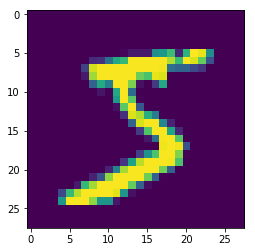

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation, MaxPooling2D, Dropout, BatchNormalization
model = Sequential()

 
model.add(Convolution2D(16, 3,3, activation='relu', input_shape=(28,28,1)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(16, 3,3, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3,3, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D())
model.add(Convolution2D(16, 1, activation='relu'))

model.add(Convolution2D(16, 3,3, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3,3, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D())
model.add(Convolution2D(16, 1, activation='relu'))

model.add(Convolution2D(10, 3,3))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


In [0]:
from keras.callbacks import EarlyStopping	
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])
es = EarlyStopping(monitor='val_acc', mode='max', min_delta=1)

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0188 - acc: 0.9937
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0172 - acc: 0.9943
Epoch 3/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0172 - acc: 0.9944
Epoch 4/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0160 - acc: 0.9951
Epoch 5/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0156 - acc: 0.9949
Epoch 6/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0151 - acc: 0.9952
Epoch 7/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0151 - acc: 0.9951
Epoch 8/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0149 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0151 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 13s 214us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.020616830508451676, 0.9936]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.3300827e-28 5.9508601e-21 3.3542186e-18 1.7011994e-12 2.5324281e-33
  2.4721697e-26 0.0000000e+00 1.0000000e+00 3.3100033e-22 5.1847606e-18]
 [6.2334889e-24 3.7521115e-23 1.0000000e+00 1.4426412e-27 0.0000000e+00
  9.5249949e-34 4.1797941e-18 1.3675504e-33 3.9244049e-29 8.9240907e-31]
 [1.2883361e-18 1.0000000e+00 2.6680901e-12 2.4170168e-15 4.1982218e-09
  7.2379136e-13 3.3461576e-16 9.4548092e-10 9.0258867e-10 1.0018245e-16]
 [1.0000000e+00 3.4859021e-28 5.0397249e-15 1.5190655e-21 1.7731451e-28
  2.6088111e-19 1.7773505e-13 9.7226409e-20 7.7356806e-18 1.0081007e-15]
 [1.3261129e-25 2.8557926e-25 3.4918070e-23 1.8378361e-23 1.0000000e+00
  3.4215987e-27 1.7989952e-27 3.3608348e-21 4.6264162e-18 1.2464414e-12]
 [5.7267951e-17 9.9999797e-01 5.8231662e-12 8.3764544e-16 8.5084390e-10
  8.1389914e-15 7.1771566e-15 2.0555208e-06 2.1016016e-09 2.5258290e-14]
 [1.5948637e-36 6.0749237e-25 9.6480854e-16 2.2051557e-19 9.9981898e-01
  7.6389261e-18 5.6329244e-29 2.6708193e-16 1.8107126e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored